<a href="https://colab.research.google.com/github/MarcosCosta-Py/QuarentenaDados/blob/master/QuarentenaDados_Aula04_(Alura).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aula 4: Estatísticas no enem 2018.**

Aqui iremos explorar e conhecer uma pequena amostra da base de dados do **ENEM 2018**. Esse será o primeiro passo para construir os **modelos de machine learning da aula 05**. Se você quiser estudar o código utilizado para criar o dataset desta aula, pode acessar este [**link aqui**](https://github.com/guilhermesilveira/enem-2018).

Vamos iniciar setando a precisão de casas decimais que o pandas irá exibir os dados (`pd.options.display.float_format`), depois lendo e conhecendo as informações contidas na base de dados.



In [0]:
# Importando a biblioteca pandas.
import pandas as pd
# Definindo a precisão de casas decimais.
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format
# Carregando os dados e apresentando as 5 primeiras linhas.
uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [0]:
# Verificando o tamanho do DF:
dados.shape

(137844, 137)

Conheça todas as colunas do nosso dataframe:

In [0]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [0]:
# Retirando algumas informações das características dos dados.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137844 entries, 0 to 137843
Columns: 137 entries, NU_INSCRICAO to Q027
dtypes: float64(30), int64(64), object(43)
memory usage: 144.1+ MB


Conhecidas as informações, vamos chamar o **describe()** para analisá-las. Se atente ao detalhe que o **describe** só gera informação de dados numéricos!

In [0]:
# Algumas estatísticas dos dados(apenas numéricos).
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

A saída do `describe` traz várias estatísticas, de forma que algumas não fazem sentido ou não nos interessam neste momento.  Entretanto, se você analisou as últimas colunas, viu que lá temos alguns dados relevantes: notas das provas e redação. 

Desafio você a entrar nos detalhes das análises de notas e diversos outros campos! Aqui vamos analisar apenas as notas entre si, mas reflita: Será que existe uma correlação entre as notas? Quem tira notas maiores em redação também vai bem em linguagens?

Vamos analisar!

In [0]:
# Selecionando apenas as colunas referentes as notas das provas, eliminando os dados faltantes,
# renomeando as colunas e apresentando as 5 primeiras linhas.
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [0]:
# Verificando a quantidade de linhas do novo DF depois das modificações acima.
len(dados_notas)

97270

Como queremos analisar as notas detalhadamente, no código acima separamos apenas os dados de interesse. Também removemos todos os valores vazios com o `.dropna()` e trocamos os nomes das colunas para ficar mais legível. 

Por fim, agora nosso DF tem 97270 linhas e 5 colunas.

Agora sim, vamos calcular a correlação usando o `.corr()`:

In [0]:
# Calculando a correlação entre as notas das provas.
corr = dados_notas.corr()
corr

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Temos vários resultados interessantes por aqui: o primeiro é uma correlação considerável entre **linguagem_codigo e ciencias_humanas**, o que parece fazer sentido. Uma correlação que surpreende é entre **linguagem_codigo e redacao**. Embora haja uma correlação maior entre **linguagem_codigo e as demais matérias** , era de ser esperar um valor ainda maior do que o existente entre **linguagem_codigo e redação**, já que ambas as provas pertecem basicamente a mesma matéria.

**Mais alguma correlação te chama a atenção?**

Eu tenho mais uma análise das correlações em geral! Repare que as correlações com linguagem_codigos sempre são as maiores e isso me faz pensar em várias hipóteses!

Será que se eu estudar mais português vou ter um desempenho melhor nas outras matérias? (lembre-se que o ENEM é uma prova que demanda interpretação de texto, então essa prerrogativa pode fazer sentido).
Será que se eu considerar provas de anos anteriores e comparar as correlações com linguagem_códigos elas serão maiores?

A verdade é que uma simples análise de correlação nos gera diversas hipóteses.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


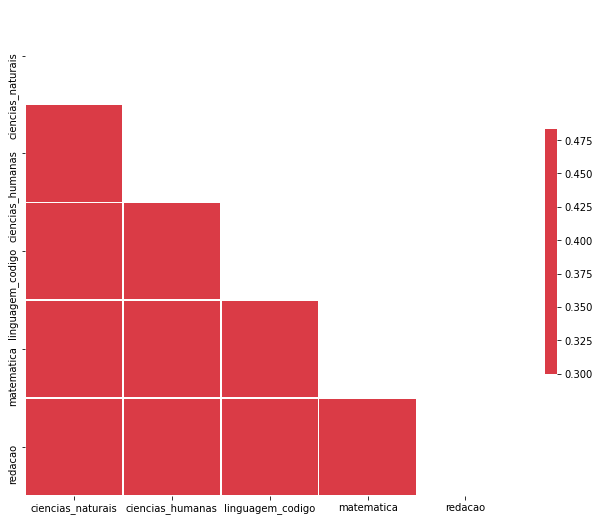

In [0]:
# Importando bibliotecas necessárias para uma melhor análise dos dados.
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

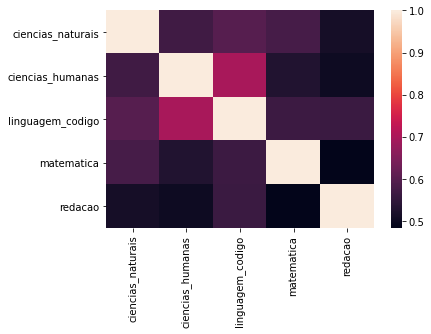

In [0]:
# Criando um mapa de calor para melhor visualizar a intensidade das correlações.
sns.heatmap(corr,)

Nós analisamos e conhecemos a base de dados, mas no final o que vou querer é construir um modelo de Machine Learning para fazer as predições de algumas notas. Para criar esse modelo de Machine Learning devemos analisar a distribuição dos nossos dados e verificar se existe alguma tendência entre eles, facilitando o processo preditivo. 

Então, vamos ao **pairplot**:

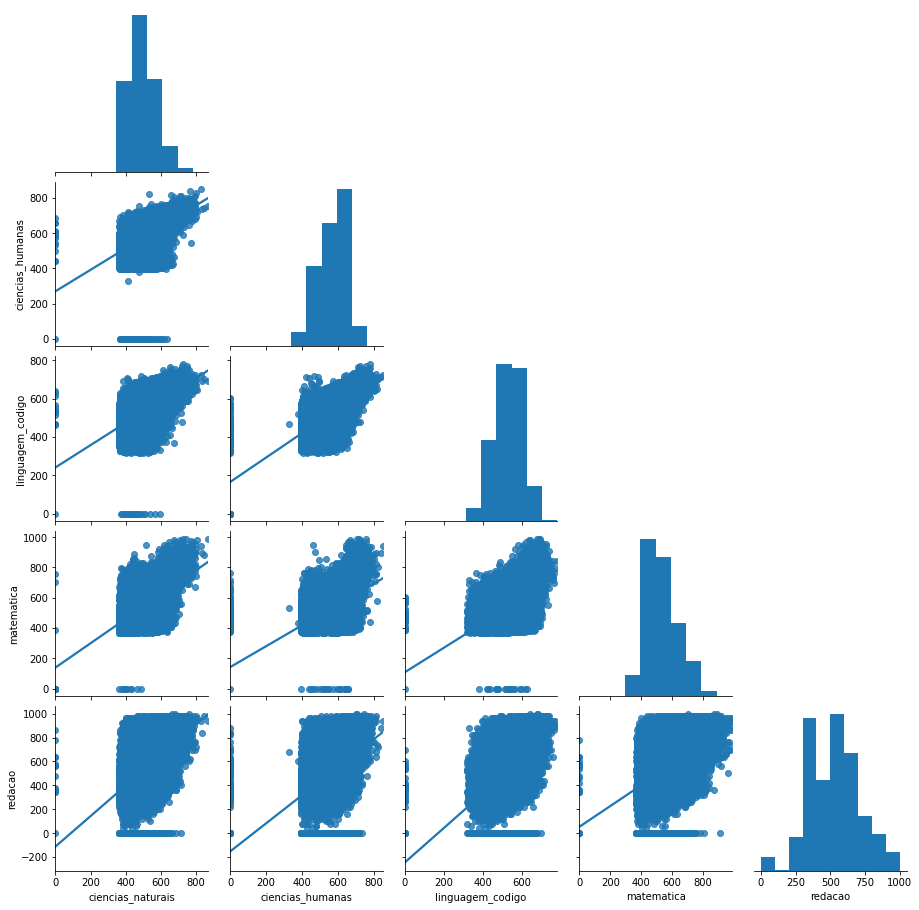

In [0]:
# Plotando os gráficos com intuito de encontrar possíveis relações entre as variáveis.
sns.pairplot(dados_notas, corner=True, kind='reg')

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível.

Com isso chegamos ao final de mais uma aula da **#quarentenadados.**

## Desafio 1 da [Thais André](https://twitter.com/thais_tandre)

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [0]:
# Tratando-se de pessoas que não teve presença: seria as quais estão com valores faltantes nas colunas das NOTAS.
# Para isso devemos tratar cada coluna de uma forma.
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_present = dados[colunas_de_notas]
dados_present.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,nan,nan,nan,nan,nan
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,nan,nan,nan,nan,nan


In [0]:
# Verificando a quantidade de valores faltantes.
dados_present.isnull().sum()

NU_NOTA_CN         40307
NU_NOTA_CH         34070
NU_NOTA_LC         34070
NU_NOTA_MT         40307
NU_NOTA_REDACAO    34070
dtype: int64

É possível perceber que a quantidade de valores faltantes para as provas de ciência da natureza e matemática são iguais, pois são aplicadas no mesmo dia. Análogo com os demais valores e provas.

In [0]:
# Preenchendo os valores faltantes com 0.
dados_present = pd.DataFrame(dados_present.fillna(0))

In [0]:
# Apresentando as 5 primeiras linhas do DF.
dados_present.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,0.00,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
4,0.00,0.00,0.00,0.00,0.00


## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

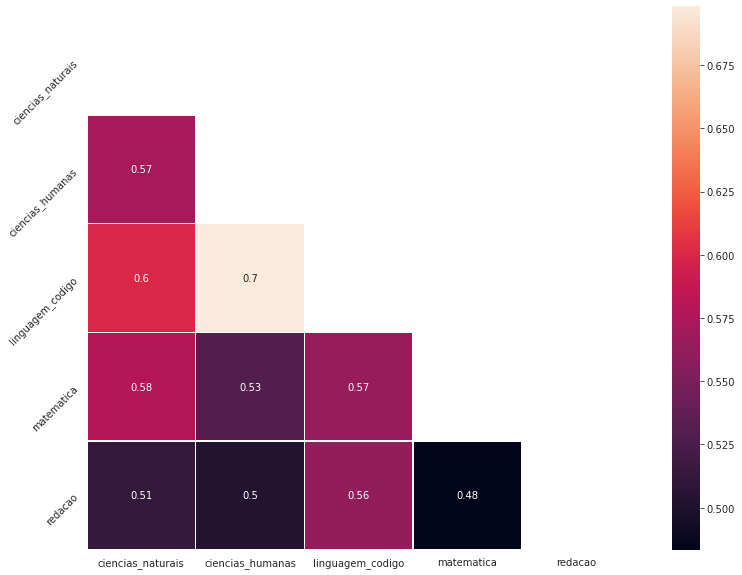

In [0]:
# Personalizando a matriz de correlação.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(corr,annot=True, mask=mask,square=True,linewidths=.5)
    plt.yticks(rotation=45)

Com base na matriz de correlação, vemos que os tons mais claros implicam em correlação maior e positiva, que é o caso de ciências humanas vs linguagem e códigos. Ademos, não temos correlação negativa.

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas

In [0]:
# Selecionando sub DF´s para analise de correlações entre acertos nas provas.
redacao = dados['NU_NOTA_REDACAO'].dropna()
respostas = dados[['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH','TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']].dropna()
gabarito = dados[['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC','TX_GABARITO_MT']].dropna()
lista_r = ['TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH','TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT']
lista_g = ['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC','TX_GABARITO_MT']

In [0]:
arquivo1 = open('acertos_cn.txt','w')
for i in range(len(respostas['TX_RESPOSTAS_CN'])):             #linhas
  for j in range(len(respostas['TX_RESPOSTAS_CN'].values[0])): # elementos
    if respostas['TX_RESPOSTAS_CN'].values[i][j] == gabarito['TX_GABARITO_CN'].values[i][j]:
      arquivo1.write(gabarito['TX_GABARITO_CN'].values[i][j])
  if i == i:
    arquivo1.write('\n')
arquivo1.close()

In [0]:
arquivo2 = open('acertos_ch.txt','w')
for i in range(len(respostas['TX_RESPOSTAS_CH'])):             #linhas
  for j in range(len(respostas['TX_RESPOSTAS_CH'].values[0])): # elementos
    if respostas['TX_RESPOSTAS_CH'].values[i][j] == gabarito['TX_GABARITO_CH'].values[i][j]:
      arquivo2.write(gabarito['TX_GABARITO_CH'].values[i][j])
  if i == i:
    arquivo2.write('\n')
arquivo2.close()

In [0]:
arquivo3 = open('acertos_lc.txt','w')
for i in range(len(respostas['TX_RESPOSTAS_LC'])):             #linhas
  for j in range(len(respostas['TX_RESPOSTAS_LC'].values[0])): # elementos
    if respostas['TX_RESPOSTAS_LC'].values[i][j] == gabarito['TX_GABARITO_LC'].values[i][j]:
      arquivo3.write(gabarito['TX_GABARITO_LC'].values[i][j])
  if i == i:
    arquivo3.write('\n')
arquivo3.close()

In [0]:
arquivo4 = open('acertos_mt.txt','w')
for i in range(len(respostas['TX_RESPOSTAS_MT'])):             #linhas
  for j in range(len(respostas['TX_RESPOSTAS_MT'].values[0])): # elementos
    if respostas['TX_RESPOSTAS_MT'].values[i][j] == gabarito['TX_GABARITO_MT'].values[i][j]:
      arquivo4.write(gabarito['TX_GABARITO_MT'].values[i][j])
  if i == i:
    arquivo4.write('\n')
arquivo4.close()

Nos comandos acima foram criados arquivos **.txt** para trabalhar melhor as informações de acertos das questões.

In [0]:
arquivo1 = open('acertos_cn.txt', 'r')
lista1 = arquivo1.readlines()
arquivo1.close()
for i in range(len(lista1)):
  lista1[i] = lista1[i].replace('\n','')
a_cn = []
for i in range(len(lista1)):
  a_cn.append(len(lista1[i]))

In [0]:
arquivo2 = open('acertos_ch.txt', 'r')
lista2 = arquivo2.readlines()
arquivo2.close()
for i in range(len(lista2)):
  lista2[i] = lista2[i].replace('\n','')
a_ch = []
for i in range(len(lista2)):
  a_ch.append(len(lista2[i]))

In [0]:
arquivo3 = open('acertos_lc.txt', 'r')
lista3 = arquivo3.readlines()
arquivo3.close()
for i in range(len(lista3)):
  lista3[i] = lista3[i].replace('\n','')
a_lc = []
for i in range(len(lista3)):
  a_lc.append(len(lista3[i]))

In [0]:
arquivo4 = open('acertos_mt.txt', 'r')
lista4 = arquivo4.readlines()
arquivo4.close()
for i in range(len(lista4)):
  lista4[i] = lista4[i].replace('\n','')
a_mt = []
for i in range(len(lista4)):
  a_mt.append(len(lista4[i]))

In [0]:
df_acn = pd.DataFrame({'acertos_cn' : a_cn})
df_ach = pd.DataFrame({'acertos_ch' : a_ch})
df_alc = pd.DataFrame({'acertos_lc' : a_lc})
df_amt = pd.DataFrame({'acertos_mt' : a_mt})

In [0]:
df_acertos = df_acn.join(df_ach)
df_acertos = df_acertos.join(df_alc)
df_acertos = df_acertos.join(df_amt)

In [0]:
df_acertos = df_acertos.join(redacao)

Os códigos acima tratam os arquivos de forma a facilitar a construção de um dataframe com os respectivos acertos nas provas.

In [0]:
# Calculando algumas medidas estatísticas para os acertos.
df_acertos.describe()

,acertos_cn,acertos_ch,acertos_lc,acertos_mt,NU_NOTA_REDACAO
count,"97,270.00","97,270.00","97,270.00","97,270.00","73,328.00"
mean,11.73,16.06,17.07,11.70,508.80
std,4.80,7.26,6.72,4.95,187.14
min,0.00,0.00,0.00,0.00,0.00
25%,9.00,11.00,12.00,8.00,360.00
50%,11.00,15.00,16.00,11.00,520.00
75%,14.00,20.00,22.00,14.00,620.00
max,44.00,45.00,41.00,43.00,"1,000.00"


In [0]:
# Identificando as correlações entre as variáveis
df_acertos.corr()

,acertos_cn,acertos_ch,acertos_lc,acertos_mt,NU_NOTA_REDACAO
acertos_cn,1.00,0.62,0.57,0.57,-0.01
acertos_ch,0.62,1.00,0.74,0.57,-0.00
acertos_lc,0.57,0.74,1.00,0.54,-0.00
acertos_mt,0.57,0.57,0.54,1.00,-0.00
NU_NOTA_REDACAO,-0.01,-0.00,-0.00,-0.00,1.00


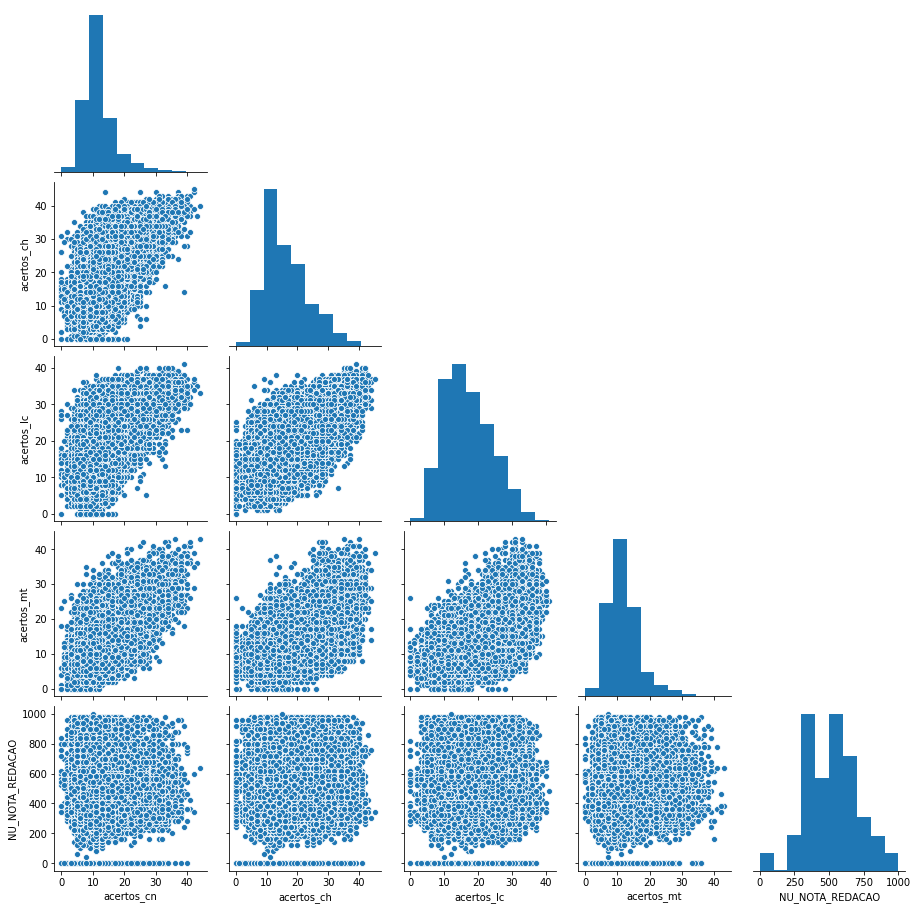

In [0]:
# Criando o pairplot para uma possível visualização da relação entre as variáveis.
sns.pairplot(df_acertos, corner=True)

Analisando os gráficos acima, é possível ver que os acertos em ciência da natureza tem uma certa relação linear positiva com acertos em ciências humanas, assim como acertos em ciências humanas e linguagens e códigos.

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [0]:
# Copiando os dados das notas para uma DF para realizar manipulações.
dados_sem_zero = dados_notas.copy()

In [0]:
# Verificando a quantidade de linhas.
len(dados_sem_zero)

97270

In [0]:
# Verificando a quantidade de zeros por coluna.
print(dados_sem_zero['ciencias_naturais'].value_counts().sort_index().head(1))
print(dados_sem_zero['ciencias_humanas'].value_counts().sort_index().head(1))
print(dados_sem_zero['linguagem_codigo'].value_counts().sort_index().head(1))
print(dados_sem_zero['matematica'].value_counts().sort_index().head(1))
print(dados_sem_zero['redacao'].value_counts().sort_index().head(1))

0.00    14
Name: ciencias_naturais, dtype: int64
0.00    85
Name: ciencias_humanas, dtype: int64
0.00    27
Name: linguagem_codigo, dtype: int64
0.00    22
Name: matematica, dtype: int64
0.00    2003
Name: redacao, dtype: int64


In [0]:
# Removendo todos os valores zeros do DF e apresentando as 5 primeiras linhas.
dados_sem_0 = dados_sem_zero.query('ciencias_naturais > 0 & ciencias_humanas > 0 & linguagem_codigo > 0 & matematica > 0 & redacao > 0 ')
dados_sem_0.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Quais questões tiveram mais erros e/ou quais provas tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [0]:
# Definindo novas colunas com a porcentagem de acertos por pessoa e por 
df_acertos['p_cn'] = df_acertos['acertos_cn'].apply(lambda x: (x/45)*100)
df_acertos['p_ch'] = df_acertos['acertos_ch'].apply(lambda x: (x/45)*100)
df_acertos['p_lc'] = df_acertos['acertos_lc'].apply(lambda x: (x/45)*100)
df_acertos['p_mt'] = df_acertos['acertos_mt'].apply(lambda x: (x/45)*100)
df_acertos.head()

,acertos_cn,acertos_ch,acertos_lc,acertos_mt,NU_NOTA_REDACAO,p_cn,p_ch,p_lc,p_mt
0,11,27,33,22,nan,24.44,60.00,73.33,48.89
1,8,9,8,6,680.00,17.78,20.00,17.78,13.33
2,7,10,11,10,600.00,15.56,22.22,24.44,22.22
3,11,9,15,8,400.00,24.44,20.00,33.33,17.78
4,8,12,15,13,nan,17.78,26.67,33.33,28.89


37.94

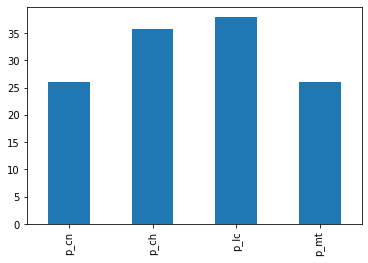

In [0]:
df_acertos[['p_cn','p_ch','p_lc','p_mt']].mean().plot(kind='bar')

Com base no gráfico de barras acima, vemos qua a prova com maiores acertos em questões é linguagem e códigos com um média de 38 pontos, e ciência da natureza e matematica tem basicamente os mesmos acertos em média(26), que são os menores entre as 4 provas.

# Desafio 6 do [Allan Spadini](https://twitter.com/allanspadini)

Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

R: Ok.